In [43]:
import numpy as np
import tqdm

from nn import (
    Convolutional,
    Dense,
    Model,
    Reshape,
    Flatten,
    Sigmoid,
    Softmax,
    Relu,
    CrossEntropy,
    optimizers,
    Dropout,
)
from nn.dataset import mnist

In [44]:
def validate_model(prediction_function, x_test, y_test):
    equal = []
    for x, y in tqdm.tqdm(
        zip(x_test, y_test), desc="Testing Model Accuracy", leave=True
    ):
        y_ = prediction_function(x)
        equal.append(1 if np.argmax(y_) == np.argmax(y) else 0)
    print(f"Model Accuracy: {sum(equal)/len(equal) * 100:.2f}%\n")


def preprocess_data(x, y, limit):
    def to_categorical(labels):
        row, column = labels.shape[0], 10
        output = np.empty(shape=(row, column))
        for r in range(row):
            temp = np.zeros((1, column))
            temp[0, labels[r]] = 1
            output[r, :] = temp
        return output

    x = x.reshape(len(x), 1, 28, 28)[:limit, :, :, :]
    x = x.astype("float32") / 255
    y = to_categorical(y)
    y = y.reshape(len(y), 10, 1)[:limit, :, :]
    return x, y

In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_limit, test_limit = 40_000, 1_000

x_train, y_train = preprocess_data(x_train, y_train, train_limit)
x_test, y_test = preprocess_data(x_test, y_test, test_limit)

In [46]:
# neural network
model = Model()
model.set_layers(
    [
        Convolutional(depth=5, kernel_size=3),
        Relu(),
        Flatten(),
        Dense(30),
        Sigmoid(),
        Dropout(0.5),
        Dense(10),
        Softmax(),
    ]
)
model.set_optimizer(
    optimizers.SGD(batch_size=50, learning_rate=0.009, cost_function=CrossEntropy())
)

In [47]:
model.compile_for(input_shape=(1, 28, 28))
model.summary()

['Convolution Layer (1, 28, 28) -> (5, 26, 26)',
 'Relu Activation',
 'Reshape Layer ((5, 26, 26)) -> (3380, 1)',
 'Dense Layer ((3380, 1) -> (30, 1))',
 'Sigmoid Activation',
 'Dropout Layer (0.5)%',
 'Dense Layer ((30, 1) -> (10, 1))',
 'Softmax Activation']

In [48]:
# train
model.train(
    x_train,
    y_train,
    epochs=10,
    validate_model=lambda prediction_function: validate_model(
        prediction_function, x_test, y_test
    ),
)

Epoch: 0, Error: 3.283953450181939


Testing Model Accuracy: 100it [00:00, 127.12it/s]


Model Accuracy: 62.00%

Epoch: 1, Error: 2.7016226178140132


Testing Model Accuracy: 100it [00:00, 134.39it/s]


Model Accuracy: 72.00%

Epoch: 2, Error: 2.444060954819368


Testing Model Accuracy: 100it [00:00, 172.47it/s]


Model Accuracy: 75.00%

Epoch: 3, Error: 2.2771885324241112


Testing Model Accuracy: 100it [00:00, 129.91it/s]


Model Accuracy: 77.00%

Epoch: 4, Error: 2.1521733567919665


Testing Model Accuracy: 100it [00:00, 157.59it/s]


Model Accuracy: 83.00%

Epoch: 5, Error: 2.0375572678943907


Testing Model Accuracy: 100it [00:00, 157.39it/s]


Model Accuracy: 82.00%

Epoch: 6, Error: 1.946792060542316


Testing Model Accuracy: 100it [00:00, 185.19it/s]


Model Accuracy: 87.00%

Epoch: 7, Error: 1.8577110505015417


Testing Model Accuracy: 100it [00:00, 254.10it/s]


Model Accuracy: 87.00%

Epoch: 8, Error: 1.7759109309136563


Testing Model Accuracy: 100it [00:00, 291.30it/s]


Model Accuracy: 91.00%

Epoch: 9, Error: 1.7096170402681659


Testing Model Accuracy: 100it [00:00, 266.21it/s]

Model Accuracy: 90.00%



In [49]:
import matplotlib.pyplot as plt

%matplotlib inline

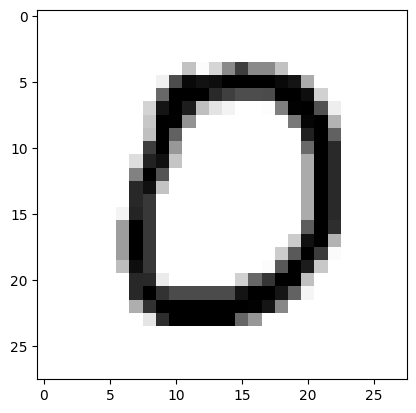

actual: 0, predicted: 0


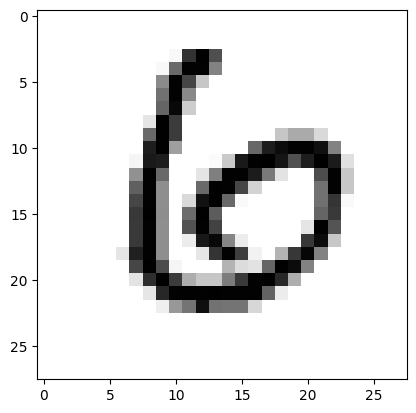

actual: 6, predicted: 0


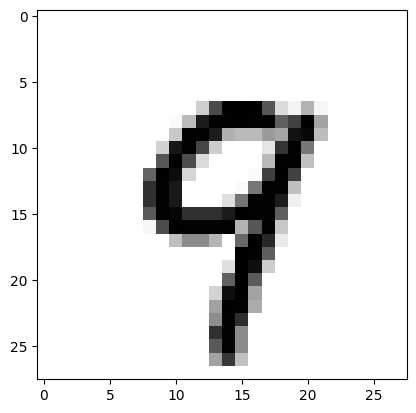

actual: 9, predicted: 9


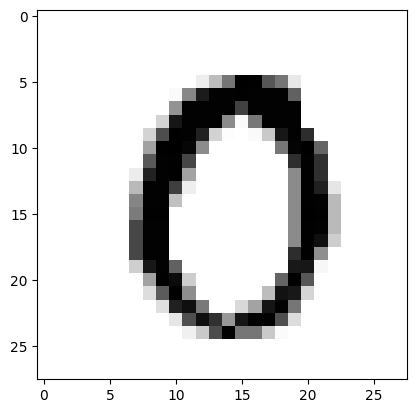

actual: 0, predicted: 0


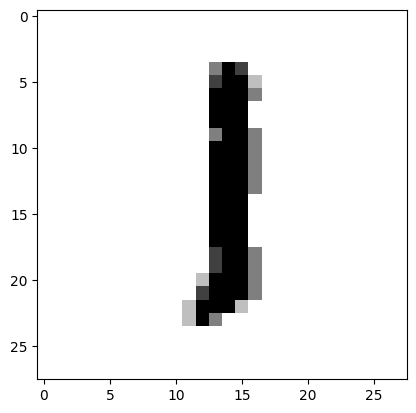

actual: 1, predicted: 1


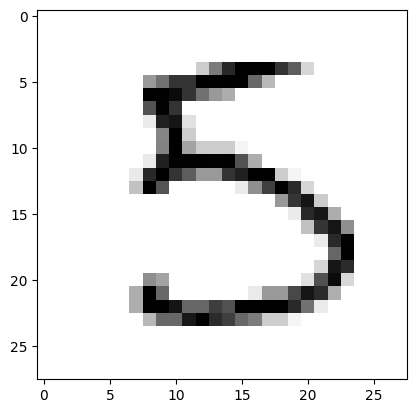

actual: 5, predicted: 5


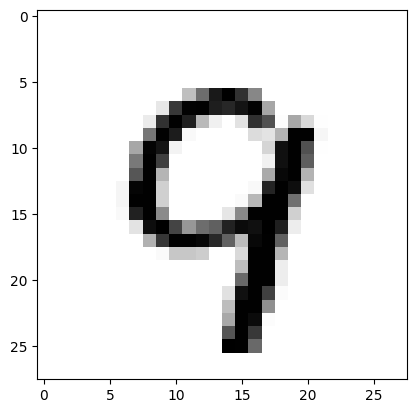

actual: 9, predicted: 9


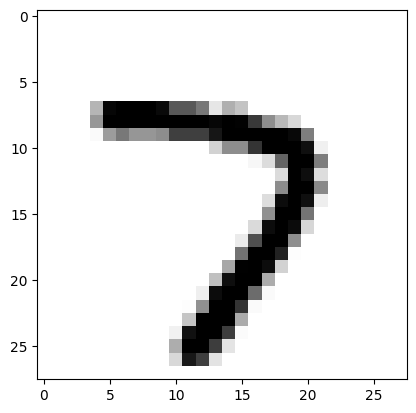

actual: 7, predicted: 7


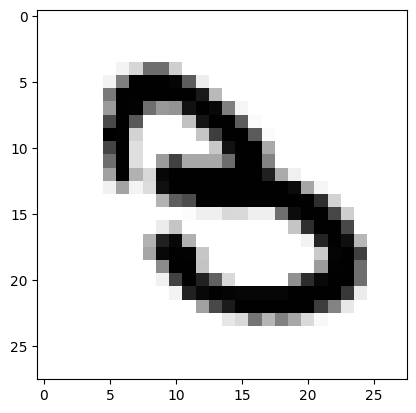

actual: 3, predicted: 3


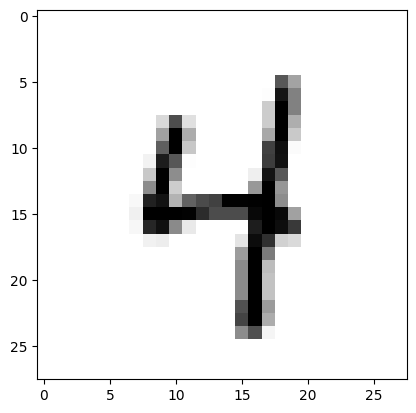

actual: 4, predicted: 4


In [50]:
index = 10
for index in range(index, index + 10):
    img = x_test[index, :, :, :]
    img_label = y_test[index]

    plt.imshow(img.reshape((28, 28)), cmap="binary")
    plt.show()

    actual_image = np.argmax(img_label)
    predicted_image = np.argmax(model.predict(img))
    print(f"actual: {actual_image}, predicted: {predicted_image}")

In [51]:
def test_extensive():
    (_, _), (x_test, y_test) = mnist.load_data()
    x_test, y_test = preprocess_data(x_test, y_test, 10_000)
    validate_model(
        model.predict,
        x_test,
        y_test,
    )

In [52]:
test_extensive()

Testing Model Accuracy: 10000it [00:43, 231.50it/s]

Model Accuracy: 86.25%

